In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Matrix Filtering (Losses in the R space)


(talk about matrix filtering)

In [342]:
def costFunction(Y, U, V, I):
    #Compute cost for given Y (data), U, V
    Y_h = np.dot(U.T,V)    
    S1 = np.multiply(I,Y) - np.multiply(I,Y_h)
    J = np.trace(np.dot(S1.T,S1))
    return J/(Y.shape[0]*Y.shape[1])

def uiGrad(yij, ui, vj, ctnt):
    #Compute individual gradient for one point
    yij_h = np.dot(ui.T,vj)        
    a1 = -(2/ctnt)*(yij - yij_h)*vj
           
    return a1

def vjGrad(yij, ui, vj, ctnt):
    #Compute individual gradient for one point
    yij_h = np.dot(ui.T,vj)        
    a1 = -(2/ctnt)*(yij - yij_h)*ui            
    return a1

def Update(U, U_grad, alpha):
    U = U - alpha*U_grad
    return U    

def Vpdate(V, V_grad, alpha):
    V = V - alpha*V_grad
    return V    

### Create Data with artificial "true" parameters:

We create arrays UR and VR, we assume 3 latent features and that we have 6 of one class and 8 for the other:

In [343]:
UR = np.array([[-12, -3, -1], [-1,30,95], 
          [5,-95,1],[85,-95,20],[-85,-125,200],[-125,235,20]]).T
          
VR = np.array([[0.06, -0.003, 0.0002], [0.8,0.6,0.02], 
          [-0.98,0.15,0.21], [-74,0.45,-21], [-44,45,-89.1],
            [48,95,0.21], [74,-45,91], [44,35.8,89.1]]).T

In [344]:
print(UR.shape);print('\n');print(VR.shape)

(3, 6)


(3, 8)


Now with this artificial parameters we create our sample data:

In [345]:
Y = np.dot(UR.T,VR)
print('Now our data has {0} shape'.format(Y.shape))

Now our data has (6, 8) shape


### Define parameters of our model:

Now we specify the parameters of our model with our data:

In [346]:
N = Y.shape[0]  #Number of users
M = Y.shape[1]  #Number of products
K = 3  #Latent Features

Finally in here we can define our training/validation data with our indicator, but for now we use all our data:

In [347]:
I = np.ones((Y.shape[0],Y.shape[1]))  #This matrix should be a 0-1 indicator for what data to use for train
I

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

We must create an index of the points we are using. We do this by obtaining them as two arrays:

In [348]:
myindex = np.where(I==1) #Get position of elements (i,j) as arrays to use for training model
n_data = len(myindex[0]) #number of training data points
pts = list(zip(myindex[0],myindex[1]))  #tuple containing ij position of our training data points
pts[0:10]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 0),
 (1, 1)]

Finally we specify where we are going to store our loss, the number of epochs and our learning rate:

In [349]:
J = []  #Create an empty vector J
epochs = 3000  #Number of loops around our data
alpha = 0.001
ctnt = N*M

And we provide starting parameters for our parameter matrices that we are going to estimate:

In [350]:
U = np.random.randn(K,N)   #We give random starting values for user parameters
V = np.random.randn(K,M)   #We give random starting values for product parameters

### Fit our model (Stochastic Gradient Descent)

In [351]:
for l in range(0, epochs):
    
    U_grad = np.zeros((K,N))
    V_grad = np.zeros((K,M))
    
    np.random.shuffle(pts)  #randomly shuffle our data points
    for k in range(n_data):  #start loop around shuffled data
        
        i = pts[k][0]
        j = pts[k][1]

        yij = Y[i,j]
        ui = U[:,i]
        vj = V[:,j]

        U_grad[:,i] += uiGrad(yij, ui, vj, ctnt)
        V_grad[:,j] += vjGrad(yij, ui, vj, ctnt)

       
    U_grad = U_grad / n_data
    V_grad = V_grad / n_data
    
    U = Update(U, U_grad, alpha)
    V = Vpdate(V, V_grad, alpha)
    
    e = costFunction(Y, U, V, I)
    J.append(e)
    
    print("Loop around data number {0} of {1}, error = {2}".format(l+1, epochs, e))

Loop around data number 1 of 3000, error = 54241823.774418056
Loop around data number 2 of 3000, error = 54241275.111174725
Loop around data number 3 of 3000, error = 54240727.696305245
Loop around data number 4 of 3000, error = 54240178.63126262
Loop around data number 5 of 3000, error = 54239625.01348808
Loop around data number 6 of 3000, error = 54239063.917507775
Loop around data number 7 of 3000, error = 54238492.37593919
Loop around data number 8 of 3000, error = 54237907.36028093
Loop around data number 9 of 3000, error = 54237305.761359364
Loop around data number 10 of 3000, error = 54236684.3693026
Loop around data number 11 of 3000, error = 54236039.85291097
Loop around data number 12 of 3000, error = 54235368.73828864
Loop around data number 13 of 3000, error = 54234667.38659737
Loop around data number 14 of 3000, error = 54233931.970787704
Loop around data number 15 of 3000, error = 54233158.451156944
Loop around data number 16 of 3000, error = 54232342.54957611
Loop around

Loop around data number 191 of 3000, error = 7940560.651940587
Loop around data number 192 of 3000, error = 7937656.405832772
Loop around data number 193 of 3000, error = 7934752.767083023
Loop around data number 194 of 3000, error = 7931840.079638526
Loop around data number 195 of 3000, error = 7928909.922092244
Loop around data number 196 of 3000, error = 7925954.915560099
Loop around data number 197 of 3000, error = 7922968.5602539
Loop around data number 198 of 3000, error = 7919945.096524741
Loop around data number 199 of 3000, error = 7916879.386754346
Loop around data number 200 of 3000, error = 7913766.814992968
Loop around data number 201 of 3000, error = 7910603.201692119
Loop around data number 202 of 3000, error = 7907384.731267523
Loop around data number 203 of 3000, error = 7904107.890560222
Loop around data number 204 of 3000, error = 7900769.416549336
Loop around data number 205 of 3000, error = 7897366.251914222
Loop around data number 206 of 3000, error = 7893895.5072

Loop around data number 371 of 3000, error = 3506220.2761906963
Loop around data number 372 of 3000, error = 3446878.4962476087
Loop around data number 373 of 3000, error = 3387641.7101442446
Loop around data number 374 of 3000, error = 3328537.410010044
Loop around data number 375 of 3000, error = 3269593.0478514847
Loop around data number 376 of 3000, error = 3210835.983181466
Loop around data number 377 of 3000, error = 3152293.4303871267
Loop around data number 378 of 3000, error = 3093992.406044412
Loop around data number 379 of 3000, error = 3035959.676391359
Loop around data number 380 of 3000, error = 2978221.7051743804
Loop around data number 381 of 3000, error = 2920804.6020826567
Loop around data number 382 of 3000, error = 2863734.071985169
Loop around data number 383 of 3000, error = 2807035.3651828393
Loop around data number 384 of 3000, error = 2750733.2288846527
Loop around data number 385 of 3000, error = 2694851.860111645
Loop around data number 386 of 3000, error = 2

Loop around data number 539 of 3000, error = 23787.35081657943
Loop around data number 540 of 3000, error = 22968.287827032105
Loop around data number 541 of 3000, error = 22176.769834490842
Loop around data number 542 of 3000, error = 21411.902242519205
Loop around data number 543 of 3000, error = 20672.818144706
Loop around data number 544 of 3000, error = 19958.67751810694
Loop around data number 545 of 3000, error = 19268.666438811455
Loop around data number 546 of 3000, error = 18601.996319032056
Loop around data number 547 of 3000, error = 17957.903165132175
Loop around data number 548 of 3000, error = 17335.646856025392
Loop around data number 549 of 3000, error = 16734.510441399034
Loop around data number 550 of 3000, error = 16153.799459227652
Loop around data number 551 of 3000, error = 15592.841272062584
Loop around data number 552 of 3000, error = 15050.98442159631
Loop around data number 553 of 3000, error = 14527.59800101647
Loop around data number 554 of 3000, error = 14

Loop around data number 715 of 3000, error = 45.931759553703536
Loop around data number 716 of 3000, error = 44.41275336182988
Loop around data number 717 of 3000, error = 42.946283920898225
Loop around data number 718 of 3000, error = 41.53048922612792
Loop around data number 719 of 3000, error = 40.16357402978212
Loop around data number 720 of 3000, error = 38.843807439500324
Loop around data number 721 of 3000, error = 37.56952060288473
Loop around data number 722 of 3000, error = 36.339104475178296
Loop around data number 723 of 3000, error = 35.15100766716471
Loop around data number 724 of 3000, error = 34.00373437034344
Loop around data number 725 of 3000, error = 32.89584235668669
Loop around data number 726 of 3000, error = 31.825941050273432
Loop around data number 727 of 3000, error = 30.792689668261932
Loop around data number 728 of 3000, error = 29.7947954286976
Loop around data number 729 of 3000, error = 28.831011822788934
Loop around data number 730 of 3000, error = 27.9

Loop around data number 889 of 3000, error = 0.4036475968797432
Loop around data number 890 of 3000, error = 0.39518009341208576
Loop around data number 891 of 3000, error = 0.38690625957302355
Loop around data number 892 of 3000, error = 0.3788211501266128
Loop around data number 893 of 3000, error = 0.37091996131925375
Loop around data number 894 of 3000, error = 0.36319802643077587
Loop around data number 895 of 3000, error = 0.3556508114733951
Loop around data number 896 of 3000, error = 0.3482739110344877
Loop around data number 897 of 3000, error = 0.34106304426135753
Loop around data number 898 of 3000, error = 0.3340140509774117
Loop around data number 899 of 3000, error = 0.3271228879294496
Loop around data number 900 of 3000, error = 0.3203856251595271
Loop around data number 901 of 3000, error = 0.3137984424980757
Loop around data number 902 of 3000, error = 0.3073576261732006
Loop around data number 903 of 3000, error = 0.3010595655326939
Loop around data number 904 of 3000

Loop around data number 1056 of 3000, error = 0.01564636711655855
Loop around data number 1057 of 3000, error = 0.015356034205905622
Loop around data number 1058 of 3000, error = 0.015071126035841908
Loop around data number 1059 of 3000, error = 0.014791539900253633
Loop around data number 1060 of 3000, error = 0.014517175085869341
Loop around data number 1061 of 3000, error = 0.014247932832043281
Loop around data number 1062 of 3000, error = 0.013983716291039366
Loop around data number 1063 of 3000, error = 0.013724430489409314
Loop around data number 1064 of 3000, error = 0.01346998229041369
Loop around data number 1065 of 3000, error = 0.01322028035662448
Loop around data number 1066 of 3000, error = 0.0129752351142971
Loop around data number 1067 of 3000, error = 0.01273475871713846
Loop around data number 1068 of 3000, error = 0.012498765012385176
Loop around data number 1069 of 3000, error = 0.012267169506522542
Loop around data number 1070 of 3000, error = 0.012039889332286108
L

Loop around data number 1234 of 3000, error = 0.0005674618735730673
Loop around data number 1235 of 3000, error = 0.0005570058670916876
Loop around data number 1236 of 3000, error = 0.0005467425775501433
Loop around data number 1237 of 3000, error = 0.0005366684509889051
Loop around data number 1238 of 3000, error = 0.0005267799990441892
Loop around data number 1239 of 3000, error = 0.0005170737977648368
Loop around data number 1240 of 3000, error = 0.0005075464863734323
Loop around data number 1241 of 3000, error = 0.0004981947661623809
Loop around data number 1242 of 3000, error = 0.0004890153992917427
Loop around data number 1243 of 3000, error = 0.00048000520769324605
Loop around data number 1244 of 3000, error = 0.0004711610719512458
Loop around data number 1245 of 3000, error = 0.0004624799302269641
Loop around data number 1246 of 3000, error = 0.0004539587771816597
Loop around data number 1247 of 3000, error = 0.0004455946629574785
Loop around data number 1248 of 3000, error = 0

Loop around data number 1398 of 3000, error = 2.6890809191626664e-05
Loop around data number 1399 of 3000, error = 2.6395470321591115e-05
Loop around data number 1400 of 3000, error = 2.5909255955723795e-05
Loop around data number 1401 of 3000, error = 2.5431998010814565e-05
Loop around data number 1402 of 3000, error = 2.496353150010718e-05
Loop around data number 1403 of 3000, error = 2.4503694470586373e-05
Loop around data number 1404 of 3000, error = 2.4052327951266827e-05
Loop around data number 1405 of 3000, error = 2.360927591006065e-05
Loop around data number 1406 of 3000, error = 2.3174385185194594e-05
Loop around data number 1407 of 3000, error = 2.2747505427579862e-05
Loop around data number 1408 of 3000, error = 2.2328489073929528e-05
Loop around data number 1409 of 3000, error = 2.191719126675021e-05
Loop around data number 1410 of 3000, error = 2.1513469818854253e-05
Loop around data number 1411 of 3000, error = 2.1117185171844537e-05
Loop around data number 1412 of 3000,

Loop around data number 1567 of 3000, error = 1.1615575315831903e-06
Loop around data number 1568 of 3000, error = 1.1401616994274374e-06
Loop around data number 1569 of 3000, error = 1.1191599778479371e-06
Loop around data number 1570 of 3000, error = 1.0985451083539845e-06
Loop around data number 1571 of 3000, error = 1.078309964121428e-06
Loop around data number 1572 of 3000, error = 1.0584475510262554e-06
Loop around data number 1573 of 3000, error = 1.0389510029859689e-06
Loop around data number 1574 of 3000, error = 1.0198135809016726e-06
Loop around data number 1575 of 3000, error = 1.0010286704110556e-06
Loop around data number 1576 of 3000, error = 9.82589776452946e-07
Loop around data number 1577 of 3000, error = 9.644905277635283e-07
Loop around data number 1578 of 3000, error = 9.467246659135173e-07
Loop around data number 1579 of 3000, error = 9.292860513457535e-07
Loop around data number 1580 of 3000, error = 9.121686548756959e-07
Loop around data number 1581 of 3000, err

Loop around data number 1747 of 3000, error = 4.089530300299339e-08
Loop around data number 1748 of 3000, error = 4.0142015562320674e-08
Loop around data number 1749 of 3000, error = 3.9402603660259755e-08
Loop around data number 1750 of 3000, error = 3.867681165703797e-08
Loop around data number 1751 of 3000, error = 3.796438860410974e-08
Loop around data number 1752 of 3000, error = 3.7265088290750536e-08
Loop around data number 1753 of 3000, error = 3.657866910553895e-08
Loop around data number 1754 of 3000, error = 3.590489359377365e-08
Loop around data number 1755 of 3000, error = 3.5243529013949024e-08
Loop around data number 1756 of 3000, error = 3.459434677424544e-08
Loop around data number 1757 of 3000, error = 3.395712232780256e-08
Loop around data number 1758 of 3000, error = 3.333163552530405e-08
Loop around data number 1759 of 3000, error = 3.271767009916097e-08
Loop around data number 1760 of 3000, error = 3.211501388686026e-08
Loop around data number 1761 of 3000, error 

Loop around data number 1914 of 3000, error = 1.8334670226577045e-09
Loop around data number 1915 of 3000, error = 1.7996947705404388e-09
Loop around data number 1916 of 3000, error = 1.7665445660892638e-09
Loop around data number 1917 of 3000, error = 1.7340050044379308e-09
Loop around data number 1918 of 3000, error = 1.7020648158844873e-09
Loop around data number 1919 of 3000, error = 1.6707129805632138e-09
Loop around data number 1920 of 3000, error = 1.63993862032858e-09
Loop around data number 1921 of 3000, error = 1.6097311251110934e-09
Loop around data number 1922 of 3000, error = 1.580080050401849e-09
Loop around data number 1923 of 3000, error = 1.5509751413705672e-09
Loop around data number 1924 of 3000, error = 1.5224063492262488e-09
Loop around data number 1925 of 3000, error = 1.4943637770403224e-09
Loop around data number 1926 of 3000, error = 1.4668377748651803e-09
Loop around data number 1927 of 3000, error = 1.4398187653882249e-09
Loop around data number 1928 of 3000,

Loop around data number 2082 of 3000, error = 8.068611016383021e-11
Loop around data number 2083 of 3000, error = 7.919987301888172e-11
Loop around data number 2084 of 3000, error = 7.774102602808867e-11
Loop around data number 2085 of 3000, error = 7.630904399387606e-11
Loop around data number 2086 of 3000, error = 7.490343542439205e-11
Loop around data number 2087 of 3000, error = 7.35237244159932e-11
Loop around data number 2088 of 3000, error = 7.216942471136588e-11
Loop around data number 2089 of 3000, error = 7.08400724189156e-11
Loop around data number 2090 of 3000, error = 6.953520575073101e-11
Loop around data number 2091 of 3000, error = 6.825437288591877e-11
Loop around data number 2092 of 3000, error = 6.699713934354284e-11
Loop around data number 2093 of 3000, error = 6.57630570283183e-11
Loop around data number 2094 of 3000, error = 6.455170927627911e-11
Loop around data number 2095 of 3000, error = 6.336267198585873e-11
Loop around data number 2096 of 3000, error = 6.219

Loop around data number 2251 of 3000, error = 3.485380502516012e-12
Loop around data number 2252 of 3000, error = 3.4211799049337383e-12
Loop around data number 2253 of 3000, error = 3.358161762919294e-12
Loop around data number 2254 of 3000, error = 3.296304817104271e-12
Loop around data number 2255 of 3000, error = 3.235587795381225e-12
Loop around data number 2256 of 3000, error = 3.175988166418776e-12
Loop around data number 2257 of 3000, error = 3.11748670964227e-12
Loop around data number 2258 of 3000, error = 3.0600632589757967e-12
Loop around data number 2259 of 3000, error = 3.0036978233186106e-12
Loop around data number 2260 of 3000, error = 2.9483695345065138e-12
Loop around data number 2261 of 3000, error = 2.8940609616573716e-12
Loop around data number 2262 of 3000, error = 2.8407526569954974e-12
Loop around data number 2263 of 3000, error = 2.7884259628623877e-12
Loop around data number 2264 of 3000, error = 2.7370630970347023e-12
Loop around data number 2265 of 3000, err

Loop around data number 2417 of 3000, error = 1.5919317520746882e-13
Loop around data number 2418 of 3000, error = 1.5626088295199278e-13
Loop around data number 2419 of 3000, error = 1.5338270421619483e-13
Loop around data number 2420 of 3000, error = 1.5055739948506124e-13
Loop around data number 2421 of 3000, error = 1.4778391107284436e-13
Loop around data number 2422 of 3000, error = 1.450619244371335e-13
Loop around data number 2423 of 3000, error = 1.4238992234285146e-13
Loop around data number 2424 of 3000, error = 1.397670513845673e-13
Loop around data number 2425 of 3000, error = 1.3719257823372987e-13
Loop around data number 2426 of 3000, error = 1.3466548552705985e-13
Loop around data number 2427 of 3000, error = 1.3218509376183462e-13
Loop around data number 2428 of 3000, error = 1.2974997617606927e-13
Loop around data number 2429 of 3000, error = 1.273599585951029e-13
Loop around data number 2430 of 3000, error = 1.2501423763890726e-13
Loop around data number 2431 of 3000,

Loop around data number 2594 of 3000, error = 5.926369537814468e-15
Loop around data number 2595 of 3000, error = 5.817189369681376e-15
Loop around data number 2596 of 3000, error = 5.710003256289461e-15
Loop around data number 2597 of 3000, error = 5.604860682815904e-15
Loop around data number 2598 of 3000, error = 5.501631858683234e-15
Loop around data number 2599 of 3000, error = 5.400268437904534e-15
Loop around data number 2600 of 3000, error = 5.300811134704326e-15
Loop around data number 2601 of 3000, error = 5.203161457916308e-15
Loop around data number 2602 of 3000, error = 5.1073403513870516e-15
Loop around data number 2603 of 3000, error = 5.013238383834791e-15
Loop around data number 2604 of 3000, error = 4.920914406873337e-15
Loop around data number 2605 of 3000, error = 4.8302814325322725e-15
Loop around data number 2606 of 3000, error = 4.7413020975903695e-15
Loop around data number 2607 of 3000, error = 4.653951870969607e-15
Loop around data number 2608 of 3000, error =

Loop around data number 2761 of 3000, error = 2.656909603776533e-16
Loop around data number 2762 of 3000, error = 2.607993432784246e-16
Loop around data number 2763 of 3000, error = 2.559945888517276e-16
Loop around data number 2764 of 3000, error = 2.51278535149689e-16
Loop around data number 2765 of 3000, error = 2.466545662758274e-16
Loop around data number 2766 of 3000, error = 2.421039735596414e-16
Loop around data number 2767 of 3000, error = 2.3764264672904857e-16
Loop around data number 2768 of 3000, error = 2.332698629979534e-16
Loop around data number 2769 of 3000, error = 2.2897249922306075e-16
Loop around data number 2770 of 3000, error = 2.2475811725952056e-16
Loop around data number 2771 of 3000, error = 2.2061296296304354e-16
Loop around data number 2772 of 3000, error = 2.1654623628852688e-16
Loop around data number 2773 of 3000, error = 2.12563894989014e-16
Loop around data number 2774 of 3000, error = 2.086459252394014e-16
Loop around data number 2775 of 3000, error =

Loop around data number 2933 of 3000, error = 1.0853307330681665e-17
Loop around data number 2934 of 3000, error = 1.0653988599182214e-17
Loop around data number 2935 of 3000, error = 1.0459214940935176e-17
Loop around data number 2936 of 3000, error = 1.0265888550147566e-17
Loop around data number 2937 of 3000, error = 1.0076595926411121e-17
Loop around data number 2938 of 3000, error = 9.890571039014516e-18
Loop around data number 2939 of 3000, error = 9.70894565908247e-18
Loop around data number 2940 of 3000, error = 9.529657891252363e-18
Loop around data number 2941 of 3000, error = 9.353525692181806e-18
Loop around data number 2942 of 3000, error = 9.18160752630888e-18
Loop around data number 2943 of 3000, error = 9.012302118378421e-18
Loop around data number 2944 of 3000, error = 8.84690397750756e-18
Loop around data number 2945 of 3000, error = 8.68351966515415e-18
Loop around data number 2946 of 3000, error = 8.523207336601207e-18
Loop around data number 2947 of 3000, error = 8

Text(0, 0.5, 'Cost Function')

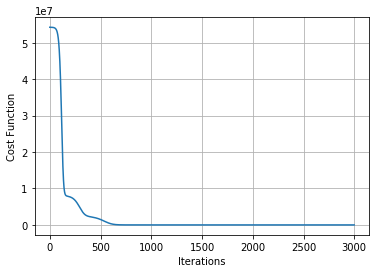

In [330]:
plt.grid(1)
plt.plot(J)
plt.xlabel('Iterations')
plt.ylabel('Cost Function') 

It works! 

## Matrix Filtering (Losses in the 0-1 space)



In [30]:
def sigmoid(z):
    #Apply sigmoid activation function to scalar, vector, or matrix
    return 1/(1+np.exp(-z))
    
def sigmoidPrime(z):
    #Gradient of sigmoid
    return np.exp(-z)/((1+np.exp(-z))**2)    

def costFunction(Y, U, V, I):
    #Compute cost for given Y (data), U, V
    S1 = np.log(sigmoid(np.dot(U.T,V)))
    S2 = np.log(1-sigmoid(np.dot(U.T,V)))
    # negative loglikelihood of our model, we have to minimize it        
    J = -np.trace(np.dot(np.multiply(I,Y),S1.T)) - np.trace(np.dot(np.multiply(I,1-Y),S2.T))  
    return J 

def uiGrad(yij, ui, vj):
    #Compute individual gradient for one point
    s1 = sigmoid(np.dot(ui.T,vj))
    s2 = sigmoidPrime(np.dot(ui.T,vj))        
    a1 = -((s2*(yij - s1))/(s1*(1-s1)))*vj             
    return a1

def vjGrad(yij, ui, vj):
    #Compute individual gradient for one point
    s1 = sigmoid(np.dot(ui.T,vj))
    s2 = sigmoidPrime(np.dot(ui.T,vj))
    a1 = -((s2*(yij - s1))/(s1*(1-s1)))*ui
    return a1
    
def Update(U, U_grad, alpha):
    U = U - alpha*U_grad
    return U    

def Vpdate(V, V_grad, alpha):
    V = V - alpha*V_grad
    return V    

In [31]:
UR = np.array([[-12, -3, -1], [-1,30,95], 
          [5,-95,1],[85,-95,20],[-85,-125,200],[-125,235,20]]).T
          
VR = np.array([[0.06, -0.003, 0.0002], [0.8,0.6,0.02], 
          [-0.98,0.15,0.21], [-74,0.45,-21], [-44,45,-89.1],
            [48,95,0.21], [74,-45,91], [44,35.8,89.1]]).T

In [32]:
Y = np.round(sigmoid(np.dot(UR.T,VR)),0)  #Data artificially created [0-1] space
Y

c:\users\rober\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


array([[0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [0., 0., 1., 1., 0., 0., 1., 1.],
       [0., 1., 1., 1., 1., 1., 0., 1.]])

In [33]:
N = Y.shape[0]  #Number of users
M = Y.shape[1]  #Number of products
K = 3  #Latent Features

In [34]:
I = np.ones((Y.shape[0],Y.shape[1]))  #This matrix should be a 0-1 indicator for what data to use for train

In [35]:
myindex = np.where(I==1) #Get position of elements (i,j) as arrays to use for training model
n_data = len(myindex[0]) #number of training data points
pts = list(zip(myindex[0],myindex[1]))  #tuple containing ij position of our training data points

In [36]:
J = []  #Create an empty vector J
epochs = 5000  #Number of loops around our data
alpha = 0.01

In [37]:
U = np.random.randn(K,N)   #We give random starting values for user parameters
V = np.random.randn(K,M)   #We give random starting values for product parameters

In [38]:
for l in range(0, epochs):
    
    U_grad = np.zeros((K,N))
    V_grad = np.zeros((K,M))
    
    np.random.shuffle(pts)  #randomly shuffle our data points
    for k in range(n_data):  #start loop around shuffled data
        
        i = pts[k][0]
        j = pts[k][1]

        yij = Y[i,j]
        ui = U[:,i]
        vj = V[:,j]

        U_grad[:,i] += uiGrad(yij, ui, vj)
        V_grad[:,j] += vjGrad(yij, ui, vj)       
    
    
    U = Update(U, U_grad, alpha)
    V = Vpdate(V, V_grad, alpha)
    
    e = costFunction(Y, U, V, I)
    J.append(e)
    
    print("Loop around data number {0} of {1}, error = {2}".format(l+1, epochs, e))

Loop around data number 1 of 5000, error = 48.97537968298097
Loop around data number 2 of 5000, error = 47.34801298816066
Loop around data number 3 of 5000, error = 45.84670311066964
Loop around data number 4 of 5000, error = 44.46258791387806
Loop around data number 5 of 5000, error = 43.18759125794023
Loop around data number 6 of 5000, error = 42.0142629530129
Loop around data number 7 of 5000, error = 40.93563828365424
Loop around data number 8 of 5000, error = 39.945119644261446
Loop around data number 9 of 5000, error = 39.03638374844812
Loop around data number 10 of 5000, error = 38.20331760339636
Loop around data number 11 of 5000, error = 37.4399846503837
Loop around data number 12 of 5000, error = 36.74061942878892
Loop around data number 13 of 5000, error = 36.09964567275827
Loop around data number 14 of 5000, error = 35.51171000937359
Loop around data number 15 of 5000, error = 34.97172226764053
Loop around data number 16 of 5000, error = 34.474894081407975
Loop around data 

Loop around data number 215 of 5000, error = 11.021375891574642
Loop around data number 216 of 5000, error = 10.956314607857566
Loop around data number 217 of 5000, error = 10.89197255270022
Loop around data number 218 of 5000, error = 10.828350007994917
Loop around data number 219 of 5000, error = 10.765446619811492
Loop around data number 220 of 5000, error = 10.703261419526136
Loop around data number 221 of 5000, error = 10.641792845996449
Loop around data number 222 of 5000, error = 10.581038768628797
Loop around data number 223 of 5000, error = 10.520996511186981
Loop around data number 224 of 5000, error = 10.461662876195298
Loop around data number 225 of 5000, error = 10.403034169793983
Loop around data number 226 of 5000, error = 10.345106226910818
Loop around data number 227 of 5000, error = 10.287874436619289
Loop around data number 228 of 5000, error = 10.231333767560617
Loop around data number 229 of 5000, error = 10.175478793314728
Loop around data number 230 of 5000, erro

Loop around data number 426 of 5000, error = 4.756181431244995
Loop around data number 427 of 5000, error = 4.735013478928719
Loop around data number 428 of 5000, error = 4.713817522209043
Loop around data number 429 of 5000, error = 4.692593635174626
Loop around data number 430 of 5000, error = 4.671341928918827
Loop around data number 431 of 5000, error = 4.650062551988632
Loop around data number 432 of 5000, error = 4.628755690824412
Loop around data number 433 of 5000, error = 4.607421570189181
Loop around data number 434 of 5000, error = 4.586060453585956
Loop around data number 435 of 5000, error = 4.564672643661825
Loop around data number 436 of 5000, error = 4.543258482597261
Loop around data number 437 of 5000, error = 4.5218183524791815
Loop around data number 438 of 5000, error = 4.500352675656251
Loop around data number 439 of 5000, error = 4.478861915074841
Loop around data number 440 of 5000, error = 4.4573465745940775
Loop around data number 441 of 5000, error = 4.435807

Loop around data number 633 of 5000, error = 1.346301549722063
Loop around data number 634 of 5000, error = 1.3388874183520443
Loop around data number 635 of 5000, error = 1.331536602020943
Loop around data number 636 of 5000, error = 1.3242484464491202
Loop around data number 637 of 5000, error = 1.3170223036275435
Loop around data number 638 of 5000, error = 1.3098575318208985
Loop around data number 639 of 5000, error = 1.3027534955669378
Loop around data number 640 of 5000, error = 1.2957095656722792
Loop around data number 641 of 5000, error = 1.2887251192048366
Loop around data number 642 of 5000, error = 1.281799539483058
Loop around data number 643 of 5000, error = 1.2749322160621537
Loop around data number 644 of 5000, error = 1.2681225447174844
Loop around data number 645 of 5000, error = 1.2613699274252541
Loop around data number 646 of 5000, error = 1.2546737723406902
Loop around data number 647 of 5000, error = 1.2480334937738278
Loop around data number 648 of 5000, error 

Loop around data number 840 of 5000, error = 0.5675642417637135
Loop around data number 841 of 5000, error = 0.5657719818973643
Loop around data number 842 of 5000, error = 0.5639893481565275
Loop around data number 843 of 5000, error = 0.5622162692874191
Loop around data number 844 of 5000, error = 0.5604526746978284
Loop around data number 845 of 5000, error = 0.558698494449843
Loop around data number 846 of 5000, error = 0.556953659252652
Loop around data number 847 of 5000, error = 0.5552181004554527
Loop around data number 848 of 5000, error = 0.5534917500404322
Loop around data number 849 of 5000, error = 0.5517745406158434
Loop around data number 850 of 5000, error = 0.5500664054091724
Loop around data number 851 of 5000, error = 0.5483672782603805
Loop around data number 852 of 5000, error = 0.5466770936152363
Loop around data number 853 of 5000, error = 0.5449957865187289
Loop around data number 854 of 5000, error = 0.5433232926085632
Loop around data number 855 of 5000, error

Loop around data number 970 of 5000, error = 0.39566013435395947
Loop around data number 971 of 5000, error = 0.394695969327008
Loop around data number 972 of 5000, error = 0.39373587218494366
Loop around data number 973 of 5000, error = 0.39277981895578684
Loop around data number 974 of 5000, error = 0.3918277858471412
Loop around data number 975 of 5000, error = 0.39087974924457775
Loop around data number 976 of 5000, error = 0.38993568571002607
Loop around data number 977 of 5000, error = 0.3889955719801924
Loop around data number 978 of 5000, error = 0.38805938496499087
Loop around data number 979 of 5000, error = 0.3871271017459841
Loop around data number 980 of 5000, error = 0.3861986995748544
Loop around data number 981 of 5000, error = 0.3852741558718755
Loop around data number 982 of 5000, error = 0.38435344822441275
Loop around data number 983 of 5000, error = 0.38343655438543117
Loop around data number 984 of 5000, error = 0.382523452272019
Loop around data number 985 of 500

Loop around data number 1113 of 5000, error = 0.29004070453068165
Loop around data number 1114 of 5000, error = 0.28947967559391324
Loop around data number 1115 of 5000, error = 0.2889205488899297
Loop around data number 1116 of 5000, error = 0.2883633153372155
Loop around data number 1117 of 5000, error = 0.2878079659097663
Loop around data number 1118 of 5000, error = 0.2872544916366777
Loop around data number 1119 of 5000, error = 0.2867028836017388
Loop around data number 1120 of 5000, error = 0.2861531329430239
Loop around data number 1121 of 5000, error = 0.28560523085249834
Loop around data number 1122 of 5000, error = 0.28505916857561187
Loop around data number 1123 of 5000, error = 0.2845149374109148
Loop around data number 1124 of 5000, error = 0.2839725287096586
Loop around data number 1125 of 5000, error = 0.28343193387541454
Loop around data number 1126 of 5000, error = 0.2828931443636879
Loop around data number 1127 of 5000, error = 0.28235615168153483
Loop around data nu

Loop around data number 1368 of 5000, error = 0.19072506150761176
Loop around data number 1369 of 5000, error = 0.1904575477271639
Loop around data number 1370 of 5000, error = 0.1901907010511803
Loop around data number 1371 of 5000, error = 0.18992451911842118
Loop around data number 1372 of 5000, error = 0.18965899957841886
Loop around data number 1373 of 5000, error = 0.1893941400914147
Loop around data number 1374 of 5000, error = 0.18912993832830244
Loop around data number 1375 of 5000, error = 0.18886639197056437
Loop around data number 1376 of 5000, error = 0.18860349871021795
Loop around data number 1377 of 5000, error = 0.18834125624975695
Loop around data number 1378 of 5000, error = 0.1880796623020872
Loop around data number 1379 of 5000, error = 0.1878187145904764
Loop around data number 1380 of 5000, error = 0.18755841084849428
Loop around data number 1381 of 5000, error = 0.18729874881995232
Loop around data number 1382 of 5000, error = 0.18703972625885348
Loop around dat

Loop around data number 1514 of 5000, error = 0.15769850145043834
Loop around data number 1515 of 5000, error = 0.15750794672432938
Loop around data number 1516 of 5000, error = 0.157317803778236
Loop around data number 1517 of 5000, error = 0.15712807134539397
Loop around data number 1518 of 5000, error = 0.1569387481640717
Loop around data number 1519 of 5000, error = 0.15674983297754885
Loop around data number 1520 of 5000, error = 0.15656132453408816
Loop around data number 1521 of 5000, error = 0.1563732215869081
Loop around data number 1522 of 5000, error = 0.1561855228941696
Loop around data number 1523 of 5000, error = 0.15599822721894163
Loop around data number 1524 of 5000, error = 0.15581133332917993
Loop around data number 1525 of 5000, error = 0.15562483999771173
Loop around data number 1526 of 5000, error = 0.15543874600219862
Loop around data number 1527 of 5000, error = 0.15525305012512225
Loop around data number 1528 of 5000, error = 0.15506775115376054
Loop around dat

Loop around data number 1670 of 5000, error = 0.1322682695098612
Loop around data number 1671 of 5000, error = 0.132129267201183
Loop around data number 1672 of 5000, error = 0.13199052749996382
Loop around data number 1673 of 5000, error = 0.13185204969815512
Loop around data number 1674 of 5000, error = 0.13171383309018506
Loop around data number 1675 of 5000, error = 0.13157587697293546
Loop around data number 1676 of 5000, error = 0.13143818064573964
Loop around data number 1677 of 5000, error = 0.1313007434103682
Loop around data number 1678 of 5000, error = 0.13116356457102113
Loop around data number 1679 of 5000, error = 0.1310266434343138
Loop around data number 1680 of 5000, error = 0.1308899793092706
Loop around data number 1681 of 5000, error = 0.13075357150731184
Loop around data number 1682 of 5000, error = 0.13061741934224752
Loop around data number 1683 of 5000, error = 0.13048152213026093
Loop around data number 1684 of 5000, error = 0.13034587918990403
Loop around data

Loop around data number 1810 of 5000, error = 0.11508012315877111
Loop around data number 1811 of 5000, error = 0.1149719599975801
Loop around data number 1812 of 5000, error = 0.11486398033197052
Loop around data number 1813 of 5000, error = 0.11475618371685654
Loop around data number 1814 of 5000, error = 0.11464856970854866
Loop around data number 1815 of 5000, error = 0.11454113786475173
Loop around data number 1816 of 5000, error = 0.11443388774455751
Loop around data number 1817 of 5000, error = 0.11432681890844171
Loop around data number 1818 of 5000, error = 0.11421993091825344
Loop around data number 1819 of 5000, error = 0.11411322333721802
Loop around data number 1820 of 5000, error = 0.11400669572992589
Loop around data number 1821 of 5000, error = 0.11390034766232648
Loop around data number 1822 of 5000, error = 0.11379417870172837
Loop around data number 1823 of 5000, error = 0.11368818841678935
Loop around data number 1824 of 5000, error = 0.11358237637751412
Loop around

Loop around data number 1944 of 5000, error = 0.1020631975917898
Loop around data number 1945 of 5000, error = 0.10197614320093455
Loop around data number 1946 of 5000, error = 0.10188922329142099
Loop around data number 1947 of 5000, error = 0.10180243756576073
Loop around data number 1948 of 5000, error = 0.10171578572731668
Loop around data number 1949 of 5000, error = 0.10162926748030482
Loop around data number 1950 of 5000, error = 0.10154288252978597
Loop around data number 1951 of 5000, error = 0.10145663058166637
Loop around data number 1952 of 5000, error = 0.10137051134269343
Loop around data number 1953 of 5000, error = 0.10128452452045408
Loop around data number 1954 of 5000, error = 0.10119866982336936
Loop around data number 1955 of 5000, error = 0.10111294696069215
Loop around data number 1956 of 5000, error = 0.1010273556425079
Loop around data number 1957 of 5000, error = 0.10094189557972488
Loop around data number 1958 of 5000, error = 0.10085656648407912
Loop around 

Loop around data number 2071 of 5000, error = 0.09199221485103559
Loop around data number 2072 of 5000, error = 0.0919201157232864
Loop around data number 2073 of 5000, error = 0.09184811923778853
Loop around data number 2074 of 5000, error = 0.09177622518502652
Loop around data number 2075 of 5000, error = 0.09170443335603853
Loop around data number 2076 of 5000, error = 0.0916327435424168
Loop around data number 2077 of 5000, error = 0.09156115553630301
Loop around data number 2078 of 5000, error = 0.09148966913039122
Loop around data number 2079 of 5000, error = 0.09141828411792136
Loop around data number 2080 of 5000, error = 0.09134700029268089
Loop around data number 2081 of 5000, error = 0.09127581744899957
Loop around data number 2082 of 5000, error = 0.09120473538175226
Loop around data number 2083 of 5000, error = 0.09113375388635195
Loop around data number 2084 of 5000, error = 0.09106287275875197
Loop around data number 2085 of 5000, error = 0.09099209179544224
Loop around 

Loop around data number 2200 of 5000, error = 0.08347126516767212
Loop around data number 2201 of 5000, error = 0.08341085298263758
Loop around data number 2202 of 5000, error = 0.08335052043247104
Loop around data number 2203 of 5000, error = 0.08329026736648198
Loop around data number 2204 of 5000, error = 0.08323009363434813
Loop around data number 2205 of 5000, error = 0.08316999908611958
Loop around data number 2206 of 5000, error = 0.08310998357220975
Loop around data number 2207 of 5000, error = 0.08305004694340279
Loop around data number 2208 of 5000, error = 0.08299018905084854
Loop around data number 2209 of 5000, error = 0.08293040974605914
Loop around data number 2210 of 5000, error = 0.08287070888091175
Loop around data number 2211 of 5000, error = 0.08281108630764811
Loop around data number 2212 of 5000, error = 0.08275154187886763
Loop around data number 2213 of 5000, error = 0.08269207544753326
Loop around data number 2214 of 5000, error = 0.08263268686696505
Loop aroun

Loop around data number 2359 of 5000, error = 0.0747756432088473
Loop around data number 2360 of 5000, error = 0.07472621778110156
Loop around data number 2361 of 5000, error = 0.07467685203592388
Loop around data number 2362 of 5000, error = 0.0746275458697285
Loop around data number 2363 of 5000, error = 0.07457829917915218
Loop around data number 2364 of 5000, error = 0.07452911186107507
Loop around data number 2365 of 5000, error = 0.0744799838126061
Loop around data number 2366 of 5000, error = 0.07443091493108298
Loop around data number 2367 of 5000, error = 0.07438190511407872
Loop around data number 2368 of 5000, error = 0.07433295425939404
Loop around data number 2369 of 5000, error = 0.07428406226506126
Loop around data number 2370 of 5000, error = 0.07423522902934077
Loop around data number 2371 of 5000, error = 0.07418645445072261
Loop around data number 2372 of 5000, error = 0.074137738427923
Loop around data number 2373 of 5000, error = 0.07408908085988705
Loop around dat

Loop around data number 2506 of 5000, error = 0.06810087253392587
Loop around data number 2507 of 5000, error = 0.06805921896408088
Loop around data number 2508 of 5000, error = 0.0680176120565103
Loop around data number 2509 of 5000, error = 0.06797605173599627
Loop around data number 2510 of 5000, error = 0.06793453792747357
Loop around data number 2511 of 5000, error = 0.06789307055603888
Loop around data number 2512 of 5000, error = 0.06785164954694423
Loop around data number 2513 of 5000, error = 0.06781027482559725
Loop around data number 2514 of 5000, error = 0.0677689463175633
Loop around data number 2515 of 5000, error = 0.06772766394856043
Loop around data number 2516 of 5000, error = 0.0676864276444644
Loop around data number 2517 of 5000, error = 0.06764523733130665
Loop around data number 2518 of 5000, error = 0.06760409293527131
Loop around data number 2519 of 5000, error = 0.06756299438269611
Loop around data number 2520 of 5000, error = 0.06752194160007441
Loop around d

Loop around data number 2636 of 5000, error = 0.06305194273917766
Loop around data number 2637 of 5000, error = 0.06301577667554062
Loop around data number 2638 of 5000, error = 0.06297964868537827
Loop around data number 2639 of 5000, error = 0.06294355871096134
Loop around data number 2640 of 5000, error = 0.06290750669467626
Loop around data number 2641 of 5000, error = 0.06287149257902198
Loop around data number 2642 of 5000, error = 0.06283551630660866
Loop around data number 2643 of 5000, error = 0.06279957782016461
Loop around data number 2644 of 5000, error = 0.06276367706252813
Loop around data number 2645 of 5000, error = 0.06272781397664769
Loop around data number 2646 of 5000, error = 0.06269198850558703
Loop around data number 2647 of 5000, error = 0.06265620059252268
Loop around data number 2648 of 5000, error = 0.06262045018073953
Loop around data number 2649 of 5000, error = 0.06258473721363615
Loop around data number 2650 of 5000, error = 0.06254906163472204
Loop aroun

Loop around data number 2764 of 5000, error = 0.05871358663576482
Loop around data number 2765 of 5000, error = 0.05868186088855834
Loop around data number 2766 of 5000, error = 0.0586501666647936
Loop around data number 2767 of 5000, error = 0.05861850391931968
Loop around data number 2768 of 5000, error = 0.058586872607070226
Loop around data number 2769 of 5000, error = 0.058555272683063424
Loop around data number 2770 of 5000, error = 0.05852370410239995
Loop around data number 2771 of 5000, error = 0.05849216682026434
Loop around data number 2772 of 5000, error = 0.05846066079192648
Loop around data number 2773 of 5000, error = 0.05842918597273704
Loop around data number 2774 of 5000, error = 0.05839774231812997
Loop around data number 2775 of 5000, error = 0.05836632978362384
Loop around data number 2776 of 5000, error = 0.05833494832481914
Loop around data number 2777 of 5000, error = 0.05830359789739743
Loop around data number 2778 of 5000, error = 0.058272278457122864
Loop aro

Loop around data number 2903 of 5000, error = 0.05458745406995835
Loop around data number 2904 of 5000, error = 0.054559711234890576
Loop around data number 2905 of 5000, error = 0.05453199437737056
Loop around data number 2906 of 5000, error = 0.05450430346230646
Loop around data number 2907 of 5000, error = 0.05447663845466596
Loop around data number 2908 of 5000, error = 0.054448999319479705
Loop around data number 2909 of 5000, error = 0.054421386021838394
Loop around data number 2910 of 5000, error = 0.054393798526895666
Loop around data number 2911 of 5000, error = 0.05436623679986491
Loop around data number 2912 of 5000, error = 0.054338700806021004
Loop around data number 2913 of 5000, error = 0.05431119051070299
Loop around data number 2914 of 5000, error = 0.05428370587930531
Loop around data number 2915 of 5000, error = 0.05425624687728489
Loop around data number 2916 of 5000, error = 0.054228813470161744
Loop around data number 2917 of 5000, error = 0.054201405623513575
Loo

Loop around data number 3034 of 5000, error = 0.051162177942913195
Loop around data number 3035 of 5000, error = 0.0511375604840775
Loop around data number 3036 of 5000, error = 0.05111296488610464
Loop around data number 3037 of 5000, error = 0.051088391120966144
Loop around data number 3038 of 5000, error = 0.05106383916068043
Loop around data number 3039 of 5000, error = 0.051039308977310446
Loop around data number 3040 of 5000, error = 0.05101480054297
Loop around data number 3041 of 5000, error = 0.05099031382981738
Loop around data number 3042 of 5000, error = 0.05096584881005756
Loop around data number 3043 of 5000, error = 0.050941405455939774
Loop around data number 3044 of 5000, error = 0.050916983739761765
Loop around data number 3045 of 5000, error = 0.050892583633867915
Loop around data number 3046 of 5000, error = 0.050868205110647394
Loop around data number 3047 of 5000, error = 0.05084384814253576
Loop around data number 3048 of 5000, error = 0.05081951270201346
Loop ar

Loop around data number 3211 of 5000, error = 0.047121653362176365
Loop around data number 3212 of 5000, error = 0.047100507738114444
Loop around data number 3213 of 5000, error = 0.047079379664144355
Loop around data number 3214 of 5000, error = 0.0470582691192165
Loop around data number 3215 of 5000, error = 0.04703717608231168
Loop around data number 3216 of 5000, error = 0.047016100532444025
Loop around data number 3217 of 5000, error = 0.04699504244866199
Loop around data number 3218 of 5000, error = 0.046974001810048224
Loop around data number 3219 of 5000, error = 0.04695297859571267
Loop around data number 3220 of 5000, error = 0.04693197278480294
Loop around data number 3221 of 5000, error = 0.04691098435649839
Loop around data number 3222 of 5000, error = 0.04689001329000835
Loop around data number 3223 of 5000, error = 0.04686905956457503
Loop around data number 3224 of 5000, error = 0.04684812315947659
Loop around data number 3225 of 5000, error = 0.04682720405402009
Loop a

Loop around data number 3350 of 5000, error = 0.04434198047080467
Loop around data number 3351 of 5000, error = 0.04432308593949001
Loop around data number 3352 of 5000, error = 0.04430420632215794
Loop around data number 3353 of 5000, error = 0.044285341601782525
Loop around data number 3354 of 5000, error = 0.044266491761364726
Loop around data number 3355 of 5000, error = 0.04424765678392946
Loop around data number 3356 of 5000, error = 0.044228836652526624
Loop around data number 3357 of 5000, error = 0.044210031350233554
Loop around data number 3358 of 5000, error = 0.04419124086014964
Loop around data number 3359 of 5000, error = 0.04417246516540317
Loop around data number 3360 of 5000, error = 0.044153704249143715
Loop around data number 3361 of 5000, error = 0.04413495809454841
Loop around data number 3362 of 5000, error = 0.04411622668481856
Loop around data number 3363 of 5000, error = 0.04409751000317921
Loop around data number 3364 of 5000, error = 0.04407880803288289
Loop 

Loop around data number 3535 of 5000, error = 0.0410837749212987
Loop around data number 3536 of 5000, error = 0.04106737398687528
Loop around data number 3537 of 5000, error = 0.04105098520427375
Loop around data number 3538 of 5000, error = 0.041034608560460956
Loop around data number 3539 of 5000, error = 0.041018244042420604
Loop around data number 3540 of 5000, error = 0.041001891637159185
Loop around data number 3541 of 5000, error = 0.04098555133169446
Loop around data number 3542 of 5000, error = 0.04096922311306944
Loop around data number 3543 of 5000, error = 0.040952906968340114
Loop around data number 3544 of 5000, error = 0.040936602884581744
Loop around data number 3545 of 5000, error = 0.04092031084888918
Loop around data number 3546 of 5000, error = 0.04090403084837502
Loop around data number 3547 of 5000, error = 0.04088776287016638
Loop around data number 3548 of 5000, error = 0.0408715069014147
Loop around data number 3549 of 5000, error = 0.04085526292928277
Loop ar

Loop around data number 3694 of 5000, error = 0.03862054173049022
Loop around data number 3695 of 5000, error = 0.03860592045690056
Loop around data number 3696 of 5000, error = 0.0385913094728085
Loop around data number 3697 of 5000, error = 0.03857670876772653
Loop around data number 3698 of 5000, error = 0.03856211833117677
Loop around data number 3699 of 5000, error = 0.038547538152699415
Loop around data number 3700 of 5000, error = 0.03853296822184549
Loop around data number 3701 of 5000, error = 0.03851840852818042
Loop around data number 3702 of 5000, error = 0.03850385906128538
Loop around data number 3703 of 5000, error = 0.038489319810754485
Loop around data number 3704 of 5000, error = 0.0384747907661936
Loop around data number 3705 of 5000, error = 0.038460271917224745
Loop around data number 3706 of 5000, error = 0.038445763253485025
Loop around data number 3707 of 5000, error = 0.03843126476462071
Loop around data number 3708 of 5000, error = 0.038416776440296466
Loop ar

Loop around data number 3839 of 5000, error = 0.03660289503073188
Loop around data number 3840 of 5000, error = 0.036589662785137915
Loop around data number 3841 of 5000, error = 0.03657643944311036
Loop around data number 3842 of 5000, error = 0.036563224995966495
Loop around data number 3843 of 5000, error = 0.036550019435030064
Loop around data number 3844 of 5000, error = 0.03653682275164231
Loop around data number 3845 of 5000, error = 0.03652363493715021
Loop around data number 3846 of 5000, error = 0.03651045598291422
Loop around data number 3847 of 5000, error = 0.036497285880304736
Loop around data number 3848 of 5000, error = 0.036484124620704425
Loop around data number 3849 of 5000, error = 0.03647097219550535
Loop around data number 3850 of 5000, error = 0.03645782859611173
Loop around data number 3851 of 5000, error = 0.03644469381393724
Loop around data number 3852 of 5000, error = 0.03643156784040977
Loop around data number 3853 of 5000, error = 0.03641845066696268
Loop 

Loop around data number 3974 of 5000, error = 0.034893732858910315
Loop around data number 3975 of 5000, error = 0.034881628261525216
Loop around data number 3976 of 5000, error = 0.03486953148880808
Loop around data number 3977 of 5000, error = 0.034857442533422295
Loop around data number 3978 of 5000, error = 0.03484536138804239
Loop around data number 3979 of 5000, error = 0.03483328804534805
Loop around data number 3980 of 5000, error = 0.03482122249803156
Loop around data number 3981 of 5000, error = 0.034809164738791566
Loop around data number 3982 of 5000, error = 0.03479711476033798
Loop around data number 3983 of 5000, error = 0.034785072555386765
Loop around data number 3984 of 5000, error = 0.034773038116664656
Loop around data number 3985 of 5000, error = 0.03476101143690715
Loop around data number 3986 of 5000, error = 0.03474899250886007
Loop around data number 3987 of 5000, error = 0.03473698132527396
Loop around data number 3988 of 5000, error = 0.034724977878912516
Loo

Loop around data number 4121 of 5000, error = 0.033194679325092555
Loop around data number 4122 of 5000, error = 0.03318365064780994
Loop around data number 4123 of 5000, error = 0.033172628806568696
Loop around data number 4124 of 5000, error = 0.03316161379522134
Loop around data number 4125 of 5000, error = 0.033150605607625276
Loop around data number 4126 of 5000, error = 0.03313960423764495
Loop around data number 4127 of 5000, error = 0.03312860967915282
Loop around data number 4128 of 5000, error = 0.033117621926028615
Loop around data number 4129 of 5000, error = 0.03310664097215943
Loop around data number 4130 of 5000, error = 0.03309566681143712
Loop around data number 4131 of 5000, error = 0.03308469943776397
Loop around data number 4132 of 5000, error = 0.03307373884504826
Loop around data number 4133 of 5000, error = 0.03306278502720482
Loop around data number 4134 of 5000, error = 0.033051837978154794
Loop around data number 4135 of 5000, error = 0.03304089769182998
Loop 

Loop around data number 4269 of 5000, error = 0.03163367519310789
Loop around data number 4270 of 5000, error = 0.031623594990829715
Loop around data number 4271 of 5000, error = 0.031613520787872204
Loop around data number 4272 of 5000, error = 0.03160345257905214
Loop around data number 4273 of 5000, error = 0.031593390359187665
Loop around data number 4274 of 5000, error = 0.03158333412310794
Loop around data number 4275 of 5000, error = 0.0315732838656459
Loop around data number 4276 of 5000, error = 0.031563239581637884
Loop around data number 4277 of 5000, error = 0.03155320126592898
Loop around data number 4278 of 5000, error = 0.031543168913370334
Loop around data number 4279 of 5000, error = 0.031533142518816434
Loop around data number 4280 of 5000, error = 0.031523122077131885
Loop around data number 4281 of 5000, error = 0.031513107583179226
Loop around data number 4282 of 5000, error = 0.03150309903183446
Loop around data number 4283 of 5000, error = 0.03149309641797948
Loo

Loop around data number 4413 of 5000, error = 0.03024146507034423
Loop around data number 4414 of 5000, error = 0.030232198106632364
Loop around data number 4415 of 5000, error = 0.0302229364521546
Loop around data number 4416 of 5000, error = 0.03021368010249262
Loop around data number 4417 of 5000, error = 0.030204429053231893
Loop around data number 4418 of 5000, error = 0.030195183299960904
Loop around data number 4419 of 5000, error = 0.030185942838276934
Loop around data number 4420 of 5000, error = 0.03017670766377717
Loop around data number 4421 of 5000, error = 0.030167477772067817
Loop around data number 4422 of 5000, error = 0.030158253158757874
Loop around data number 4423 of 5000, error = 0.030149033819461473
Loop around data number 4424 of 5000, error = 0.03013981974979675
Loop around data number 4425 of 5000, error = 0.03013061094538865
Loop around data number 4426 of 5000, error = 0.030121407401865006
Loop around data number 4427 of 5000, error = 0.030112209114857694
Lo

Loop around data number 4542 of 5000, error = 0.02908836640066626
Loop around data number 4543 of 5000, error = 0.029079749453644298
Loop around data number 4544 of 5000, error = 0.02907113728330308
Loop around data number 4545 of 5000, error = 0.029062529885792693
Loop around data number 4546 of 5000, error = 0.029053927257269352
Loop around data number 4547 of 5000, error = 0.029045329393891723
Loop around data number 4548 of 5000, error = 0.029036736291822254
Loop around data number 4549 of 5000, error = 0.029028147947229094
Loop around data number 4550 of 5000, error = 0.02901956435628295
Loop around data number 4551 of 5000, error = 0.029010985515159536
Loop around data number 4552 of 5000, error = 0.029002411420037594
Loop around data number 4553 of 5000, error = 0.028993842067101087
Loop around data number 4554 of 5000, error = 0.028985277452536228
Loop around data number 4555 of 5000, error = 0.028976717572535123
Loop around data number 4556 of 5000, error = 0.02896816242329489

Loop around data number 4722 of 5000, error = 0.027610753182017063
Loop around data number 4723 of 5000, error = 0.02760293769515715
Loop around data number 4724 of 5000, error = 0.027595126352777458
Loop around data number 4725 of 5000, error = 0.027587319151679182
Loop around data number 4726 of 5000, error = 0.027579516088670875
Loop around data number 4727 of 5000, error = 0.027571717160561754
Loop around data number 4728 of 5000, error = 0.02756392236416338
Loop around data number 4729 of 5000, error = 0.027556131696293222
Loop around data number 4730 of 5000, error = 0.027548345153771303
Loop around data number 4731 of 5000, error = 0.027540562733417324
Loop around data number 4732 of 5000, error = 0.027532784432060576
Loop around data number 4733 of 5000, error = 0.02752501024652798
Loop around data number 4734 of 5000, error = 0.027517240173651064
Loop around data number 4735 of 5000, error = 0.027509474210267573
Loop around data number 4736 of 5000, error = 0.02750171235321403

Loop around data number 4849 of 5000, error = 0.026650312958660514
Loop around data number 4850 of 5000, error = 0.02664299927875601
Loop around data number 4851 of 5000, error = 0.02663568936187142
Loop around data number 4852 of 5000, error = 0.026628383205188216
Loop around data number 4853 of 5000, error = 0.026621080805891213
Loop around data number 4854 of 5000, error = 0.026613782161169785
Loop around data number 4855 of 5000, error = 0.026606487268214324
Loop around data number 4856 of 5000, error = 0.02659919612421687
Loop around data number 4857 of 5000, error = 0.026591908726377414
Loop around data number 4858 of 5000, error = 0.026584625071892666
Loop around data number 4859 of 5000, error = 0.0265773451579644
Loop around data number 4860 of 5000, error = 0.026570068981796806
Loop around data number 4861 of 5000, error = 0.026562796540600214
Loop around data number 4862 of 5000, error = 0.026555527831581393
Loop around data number 4863 of 5000, error = 0.026548262851953247


Text(0, 0.5, 'Cost Function')

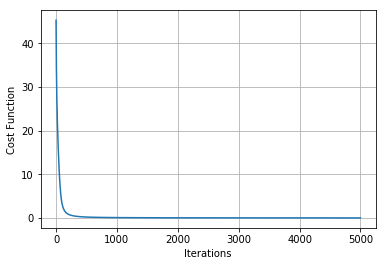

In [399]:
plt.grid(1)
plt.plot(J)
plt.xlabel('Iterations')
plt.ylabel('Cost Function') 

Notice we do not need average!

## Improve the algorithm

Lets try to do a whle pass in one operation:

In [279]:
def sigmoid(z):
    #Apply sigmoid activation function to scalar, vector, or matrix
    return 1/(1+np.exp(-z))
    
def sigmoidPrime(z):
    #Gradient of sigmoid
    return np.exp(-z)/((1+np.exp(-z))**2)

def costFunction(Y, U, V, I):
    #Compute cost for given Y (data), U, V
    S1 = np.log(sigmoid(np.dot(U.T,V)))
    S2 = np.log(1-sigmoid(np.dot(U.T,V)))
    # negative loglikelihood of our model, we have to minimize it        
    J = -np.trace(np.dot(np.multiply(I,Y),S1.T)) - np.trace(np.dot(np.multiply(I,1-Y),S2.T))  
    return J 

def compS(Y,U,V):
    S1 = sigmoid(np.dot(U.T,V))
    S2 = sigmoidPrime(np.dot(U.T,V))
    S3 = S2 * (Y - S1)
    S4 = S1 * (1 - S1)
    S5 = S3/S4
    return S5

def UGrad(S, U, V):
    N = U.shape[1]  
    K = U.shape[0]
    U_grad = np.zeros((K,N))
    for i in range(N):
        U_grad[:,i] = -1 * (S[i,:] * V).sum(axis=1)
    return U_grad

def VGrad(S, U, V):
    M = V.shape[1]  
    K = U.shape[0]
    V_grad = np.zeros((K,M))
    for j in range(M):
        V_grad[:,j] = -1 * (S[:,j] * U).sum(axis=1)
    return V_grad

def Update(U, U_grad, alpha):
    U = U - alpha*U_grad
    return U    

def Vpdate(V, V_grad, alpha):
    V = V - alpha*V_grad
    return V    

In [280]:
UR = np.array([[-12, -3, -1], [-1,30,95], 
          [5,-95,1],[85,-95,20],[-85,-125,200],[-125,235,20]]).T
          
VR = np.array([[0.06, -0.003, 0.0002], [0.8,0.6,0.02], 
          [-0.98,0.15,0.21], [-74,0.45,-21], [-44,45,-89.1],
            [48,95,0.21], [74,-45,91], [44,35.8,89.1]]).T

In [281]:
Y = np.round(sigmoid(np.dot(UR.T,VR)),0)  #Data artificially created [0-1] space
Y

c:\users\rober\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


array([[0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [0., 0., 1., 1., 0., 0., 1., 1.],
       [0., 1., 1., 1., 1., 1., 0., 1.]])

In [282]:
N = Y.shape[0]  #Number of users
M = Y.shape[1]  #Number of products
K = 3  #Latent Features

In [283]:
J = []  #Create an empty vector J
epochs = 5000  #Number of loops around our data
alpha = 0.01

In [284]:
U = np.random.randn(K,N)   #We give random starting values for user parameters
V = np.random.randn(K,M)   #We give random starting values for product parameters

In [285]:
for l in range(0, epochs):    
    
    S = compS(Y,U,V)
    
    U_grad = UGrad(S, U, V)
    
    V_grad = VGrad(S, U, V)      
    
    U = Update(U, U_grad, alpha)
    V = Vpdate(V, V_grad, alpha)
    
    e = costFunction(Y, U, V, I)
    J.append(e)
    
    print("Loop around data number {0} of {1}, error = {2}".format(l+1, epochs, e))

Loop around data number 1 of 5000, error = 31.049990522495435
Loop around data number 2 of 5000, error = 30.63770028949724
Loop around data number 3 of 5000, error = 30.240205072716382
Loop around data number 4 of 5000, error = 29.856668465067482
Loop around data number 5 of 5000, error = 29.486314552322057
Loop around data number 6 of 5000, error = 29.12842137095001
Loop around data number 7 of 5000, error = 28.782315197879473
Loop around data number 8 of 5000, error = 28.447365594985946
Loop around data number 9 of 5000, error = 28.122981132353694
Loop around data number 10 of 5000, error = 27.808605715587596
Loop around data number 11 of 5000, error = 27.50371544424437
Loop around data number 12 of 5000, error = 27.207815931143884
Loop around data number 13 of 5000, error = 26.920440016053014
Loop around data number 14 of 5000, error = 26.64114581197186
Loop around data number 15 of 5000, error = 26.369515027822185
Loop around data number 16 of 5000, error = 26.10515151748829
Loop a

Loop around data number 313 of 5000, error = 1.69469562462156
Loop around data number 314 of 5000, error = 1.684435070380442
Loop around data number 315 of 5000, error = 1.6742806048703902
Loop around data number 316 of 5000, error = 1.6642306740910322
Loop around data number 317 of 5000, error = 1.6542837534622659
Loop around data number 318 of 5000, error = 1.6444383471530117
Loop around data number 319 of 5000, error = 1.6346929874271985
Loop around data number 320 of 5000, error = 1.6250462340064984
Loop around data number 321 of 5000, error = 1.6154966734493865
Loop around data number 322 of 5000, error = 1.6060429185460765
Loop around data number 323 of 5000, error = 1.5966836077289122
Loop around data number 324 of 5000, error = 1.5874174044978164
Loop around data number 325 of 5000, error = 1.5782429968603608
Loop around data number 326 of 5000, error = 1.5691590967861027
Loop around data number 327 of 5000, error = 1.5601644396747683
Loop around data number 328 of 5000, error 

Loop around data number 592 of 5000, error = 0.5575749367285824
Loop around data number 593 of 5000, error = 0.5560510991412217
Loop around data number 594 of 5000, error = 0.5545344673854339
Loop around data number 595 of 5000, error = 0.553024993537889
Loop around data number 596 of 5000, error = 0.5515226300848431
Loop around data number 597 of 5000, error = 0.5500273299178575
Loop around data number 598 of 5000, error = 0.5485390463295814
Loop around data number 599 of 5000, error = 0.547057733009577
Loop around data number 600 of 5000, error = 0.5455833440402005
Loop around data number 601 of 5000, error = 0.5441158338925345
Loop around data number 602 of 5000, error = 0.5426551574223664
Loop around data number 603 of 5000, error = 0.5412012698662196
Loop around data number 604 of 5000, error = 0.5397541268374333
Loop around data number 605 of 5000, error = 0.5383136843222813
Loop around data number 606 of 5000, error = 0.5368798986761548
Loop around data number 607 of 5000, error

Loop around data number 820 of 5000, error = 0.3337229643694247
Loop around data number 821 of 5000, error = 0.3331002397196775
Loop around data number 822 of 5000, error = 0.3324795531228491
Loop around data number 823 of 5000, error = 0.33186089514549144
Loop around data number 824 of 5000, error = 0.3312442564103693
Loop around data number 825 of 5000, error = 0.3306296275960669
Loop around data number 826 of 5000, error = 0.33001699943656726
Loop around data number 827 of 5000, error = 0.3294063627208593
Loop around data number 828 of 5000, error = 0.3287977082925363
Loop around data number 829 of 5000, error = 0.32819102704939923
Loop around data number 830 of 5000, error = 0.3275863099430702
Loop around data number 831 of 5000, error = 0.3269835479785943
Loop around data number 832 of 5000, error = 0.3263827322140679
Loop around data number 833 of 5000, error = 0.32578385376024144
Loop around data number 834 of 5000, error = 0.32518690378015275
Loop around data number 835 of 5000

Loop around data number 1060 of 5000, error = 0.22688985283451327
Loop around data number 1061 of 5000, error = 0.22657453815703033
Loop around data number 1062 of 5000, error = 0.2262599996573133
Loop around data number 1063 of 5000, error = 0.22594623462007263
Loop around data number 1064 of 5000, error = 0.22563324034228063
Loop around data number 1065 of 5000, error = 0.2253210141331099
Loop around data number 1066 of 5000, error = 0.2250095533138568
Loop around data number 1067 of 5000, error = 0.22469885521788568
Loop around data number 1068 of 5000, error = 0.2243889171905531
Loop around data number 1069 of 5000, error = 0.22407973658914593
Loop around data number 1070 of 5000, error = 0.22377131078281676
Loop around data number 1071 of 5000, error = 0.22346363715251513
Loop around data number 1072 of 5000, error = 0.223156713090927
Loop around data number 1073 of 5000, error = 0.22285053600240615
Loop around data number 1074 of 5000, error = 0.22254510330291571
Loop around data

Loop around data number 1359 of 5000, error = 0.15822954522065158
Loop around data number 1360 of 5000, error = 0.15806352299717463
Loop around data number 1361 of 5000, error = 0.15789781195455332
Loop around data number 1362 of 5000, error = 0.15773241126030113
Loop around data number 1363 of 5000, error = 0.15756732008481705
Loop around data number 1364 of 5000, error = 0.15740253760136902
Loop around data number 1365 of 5000, error = 0.157238062986086
Loop around data number 1366 of 5000, error = 0.15707389541794173
Loop around data number 1367 of 5000, error = 0.15691003407874698
Loop around data number 1368 of 5000, error = 0.15674647815313303
Loop around data number 1369 of 5000, error = 0.1565832268285422
Loop around data number 1370 of 5000, error = 0.156420279295218
Loop around data number 1371 of 5000, error = 0.15625763474618792
Loop around data number 1372 of 5000, error = 0.15609529237725733
Loop around data number 1373 of 5000, error = 0.1559332513869942
Loop around data

Loop around data number 1823 of 5000, error = 0.10479791573125169
Loop around data number 1824 of 5000, error = 0.10471866831704757
Loop around data number 1825 of 5000, error = 0.10463952889321912
Loop around data number 1826 of 5000, error = 0.10456049724878662
Loop around data number 1827 of 5000, error = 0.10448157317330652
Loop around data number 1828 of 5000, error = 0.10440275645686838
Loop around data number 1829 of 5000, error = 0.10432404689009375
Loop around data number 1830 of 5000, error = 0.1042454442641329
Loop around data number 1831 of 5000, error = 0.10416694837066781
Loop around data number 1832 of 5000, error = 0.10408855900190216
Loop around data number 1833 of 5000, error = 0.10401027595057036
Loop around data number 1834 of 5000, error = 0.10393209900992807
Loop around data number 1835 of 5000, error = 0.10385402797375137
Loop around data number 1836 of 5000, error = 0.10377606263634005
Loop around data number 1837 of 5000, error = 0.1036982027925118
Loop around 

Loop around data number 2292 of 5000, error = 0.07670333058899406
Loop around data number 2293 of 5000, error = 0.0766582564316558
Loop around data number 2294 of 5000, error = 0.07661323029387719
Loop around data number 2295 of 5000, error = 0.07656825210209459
Loop around data number 2296 of 5000, error = 0.07652332178288898
Loop around data number 2297 of 5000, error = 0.07647843926298838
Loop around data number 2298 of 5000, error = 0.0764336044692665
Loop around data number 2299 of 5000, error = 0.0763888173287431
Loop around data number 2300 of 5000, error = 0.07634407776858217
Loop around data number 2301 of 5000, error = 0.07629938571609438
Loop around data number 2302 of 5000, error = 0.07625474109873079
Loop around data number 2303 of 5000, error = 0.07621014384409244
Loop around data number 2304 of 5000, error = 0.07616559387991874
Loop around data number 2305 of 5000, error = 0.07612109113409554
Loop around data number 2306 of 5000, error = 0.07607663553465165
Loop around d

Loop around data number 2675 of 5000, error = 0.06237834456198357
Loop around data number 2676 of 5000, error = 0.06234738301949634
Loop around data number 2677 of 5000, error = 0.06231644944129221
Loop around data number 2678 of 5000, error = 0.06228554379098404
Loop around data number 2679 of 5000, error = 0.062254666032248614
Loop around data number 2680 of 5000, error = 0.06222381612882024
Loop around data number 2681 of 5000, error = 0.06219299404449898
Loop around data number 2682 of 5000, error = 0.062162199743143146
Loop around data number 2683 of 5000, error = 0.062131433188673015
Loop around data number 2684 of 5000, error = 0.062100694345070526
Loop around data number 2685 of 5000, error = 0.06206998317637659
Loop around data number 2686 of 5000, error = 0.0620392996466967
Loop around data number 2687 of 5000, error = 0.06200864372019141
Loop around data number 2688 of 5000, error = 0.06197801536108792
Loop around data number 2689 of 5000, error = 0.061947414533669996
Loop a

Loop around data number 3086 of 5000, error = 0.051653064415266084
Loop around data number 3087 of 5000, error = 0.05163111351188978
Loop around data number 3088 of 5000, error = 0.05160917963809532
Loop around data number 3089 of 5000, error = 0.05158726277482
Loop around data number 3090 of 5000, error = 0.05156536290302827
Loop around data number 3091 of 5000, error = 0.051543480003711846
Loop around data number 3092 of 5000, error = 0.05152161405789127
Loop around data number 3093 of 5000, error = 0.05149976504661581
Loop around data number 3094 of 5000, error = 0.05147793295095933
Loop around data number 3095 of 5000, error = 0.05145611775202351
Loop around data number 3096 of 5000, error = 0.051434319430943294
Loop around data number 3097 of 5000, error = 0.05141253796887324
Loop around data number 3098 of 5000, error = 0.05139077334699918
Loop around data number 3099 of 5000, error = 0.051369025546535864
Loop around data number 3100 of 5000, error = 0.05134729454872175
Loop arou

Loop around data number 3508 of 5000, error = 0.043696965135593485
Loop around data number 3509 of 5000, error = 0.04368079809702567
Loop around data number 3510 of 5000, error = 0.04366464200801566
Loop around data number 3511 of 5000, error = 0.04364849685784841
Loop around data number 3512 of 5000, error = 0.04363236263582375
Loop around data number 3513 of 5000, error = 0.04361623933125387
Loop around data number 3514 of 5000, error = 0.043600126933466515
Loop around data number 3515 of 5000, error = 0.04358402543180036
Loop around data number 3516 of 5000, error = 0.04356793481561003
Loop around data number 3517 of 5000, error = 0.04355185507426276
Loop around data number 3518 of 5000, error = 0.04353578619713876
Loop around data number 3519 of 5000, error = 0.04351972817363329
Loop around data number 3520 of 5000, error = 0.04350368099315323
Loop around data number 3521 of 5000, error = 0.043487644645119505
Loop around data number 3522 of 5000, error = 0.04347161911896871
Loop ar

Loop around data number 3916 of 5000, error = 0.03790334724267538
Loop around data number 3917 of 5000, error = 0.03789089048438524
Loop around data number 3918 of 5000, error = 0.037878441237081464
Loop around data number 3919 of 5000, error = 0.037865999494212724
Loop around data number 3920 of 5000, error = 0.03785356524923637
Loop around data number 3921 of 5000, error = 0.03784113849561691
Loop around data number 3922 of 5000, error = 0.0378287192268262
Loop around data number 3923 of 5000, error = 0.037816307436344024
Loop around data number 3924 of 5000, error = 0.0378039031176574
Loop around data number 3925 of 5000, error = 0.03779150626426061
Loop around data number 3926 of 5000, error = 0.0377791168696552
Loop around data number 3927 of 5000, error = 0.03776673492734972
Loop around data number 3928 of 5000, error = 0.03775436043086155
Loop around data number 3929 of 5000, error = 0.0377419933737143
Loop around data number 3930 of 5000, error = 0.037729633749437955
Loop aroun

Loop around data number 4290 of 5000, error = 0.03371718406929379
Loop around data number 4291 of 5000, error = 0.03370713657079634
Loop around data number 4292 of 5000, error = 0.03369709457543345
Loop around data number 4293 of 5000, error = 0.0336870580788427
Loop around data number 4294 of 5000, error = 0.033677027076662466
Loop around data number 4295 of 5000, error = 0.03366700156454273
Loop around data number 4296 of 5000, error = 0.033656981538131424
Loop around data number 4297 of 5000, error = 0.03364696699308333
Loop around data number 4298 of 5000, error = 0.03363695792505855
Loop around data number 4299 of 5000, error = 0.03362695432972111
Loop around data number 4300 of 5000, error = 0.03361695620273934
Loop around data number 4301 of 5000, error = 0.0336069635397851
Loop around data number 4302 of 5000, error = 0.03359697633653643
Loop around data number 4303 of 5000, error = 0.033586994588674396
Loop around data number 4304 of 5000, error = 0.03357701829188689
Loop arou

Loop around data number 4663 of 5000, error = 0.0303171061910918
Loop around data number 4664 of 5000, error = 0.03030884331125797
Loop around data number 4665 of 5000, error = 0.030300584577268502
Loop around data number 4666 of 5000, error = 0.030292329986106717
Loop around data number 4667 of 5000, error = 0.030284079534766077
Loop around data number 4668 of 5000, error = 0.030275833220236702
Loop around data number 4669 of 5000, error = 0.030267591039514284
Loop around data number 4670 of 5000, error = 0.03025935298959641
Loop around data number 4671 of 5000, error = 0.03025111906748345
Loop around data number 4672 of 5000, error = 0.030242889270181234
Loop around data number 4673 of 5000, error = 0.0302346635946947
Loop around data number 4674 of 5000, error = 0.030226442038034592
Loop around data number 4675 of 5000, error = 0.030218224597211074
Loop around data number 4676 of 5000, error = 0.030210011269240583
Loop around data number 4677 of 5000, error = 0.030201802051141532
Lo

### Improve it in R space:



In [6]:
def sigmoid(z):
    #Apply sigmoid activation function to scalar, vector, or matrix
    return 1/(1+np.exp(-z))

def costFunction(Y, U, V):
    #Compute cost for given Y (data), U, V
    Y_h = np.dot(U.T,V)    
    S1 = Y - Y_h
    J = np.trace(np.dot(S1.T,S1))
    return J/(Y.shape[0]*Y.shape[1])

def compS(Y, U, V):
    Y_h = np.dot(U.T,V)
    S1 = Y - Y_h 
    return S1

def UGrad(S, U, V, ctnt):
    N = U.shape[1]  
    K = U.shape[0]
    U_grad = np.zeros((K,N))
    for i in range(N):
        U_grad[:,i] = -(2/ctnt) * (S[i,:] * V).sum(axis=1)
    return U_grad

def VGrad(S, U, V, ctnt):
    M = V.shape[1]  
    K = U.shape[0]
    V_grad = np.zeros((K,M))
    for j in range(M):
        V_grad[:,j] = -(2/ctnt) * (S[:,j] * U).sum(axis=1)
    return V_grad

def Update(U, U_grad, alpha):
    U = U - alpha*U_grad
    return U    

def Vpdate(V, V_grad, alpha):
    V = V - alpha*V_grad
    return V 

In [7]:
UR = np.array([[-12, -3, -1], [-1,30,95], 
          [5,-95,1],[85,-95,20],[-85,-125,200],[-125,235,20]]).T
          
VR = np.array([[0.06, -0.003, 0.0002], [0.8,0.6,0.02], 
          [-0.98,0.15,0.21], [-74,0.45,-21], [-44,45,-89.1],
            [48,95,0.21], [74,-45,91], [44,35.8,89.1]]).T

In [8]:
Y = np.round(sigmoid(np.dot(UR.T,VR)),0)  #Data artificially created [0-1] space
Y

c:\users\rober\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


array([[0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [0., 0., 1., 1., 0., 0., 1., 1.],
       [0., 1., 1., 1., 1., 1., 0., 1.]])

In [13]:
N = Y.shape[0]  #Number of users
M = Y.shape[1]  #Number of products
K = 3  #Latent Features

In [14]:
J = []  #Create an empty vector J
epochs = 5000  #Number of loops around our data
alpha = 0.01
ctnt = M * N

In [15]:
U = np.random.randn(K,N)   #We give random starting values for user parameters
V = np.random.randn(K,M)   #We give random starting values for product parameters

In [16]:
for l in range(0, epochs):    
    
    S = compS(Y,U,V)
    
    U_grad = UGrad(S, U, V, ctnt)
    
    V_grad = VGrad(S, U, V, ctnt)      
    
    U = Update(U, U_grad, alpha)
    V = Vpdate(V, V_grad, alpha)
    
    e = costFunction(Y, U, V)
    J.append(e)
    
    print("Loop around data number {0} of {1}, error = {2}".format(l+1, epochs, e))

Loop around data number 1 of 5000, error = 5.89393423870369
Loop around data number 2 of 5000, error = 5.771822007927626
Loop around data number 3 of 5000, error = 5.653579617771782
Loop around data number 4 of 5000, error = 5.539041638382521
Loop around data number 5 of 5000, error = 5.4280515534028915
Loop around data number 6 of 5000, error = 5.320461182285293
Loop around data number 7 of 5000, error = 5.216130146219084
Loop around data number 8 of 5000, error = 5.114925373925186
Loop around data number 9 of 5000, error = 5.016720643929971
Loop around data number 10 of 5000, error = 4.921396160252673
Loop around data number 11 of 5000, error = 4.828838158728827
Loop around data number 12 of 5000, error = 4.738938541450557
Loop around data number 13 of 5000, error = 4.651594537036354
Loop around data number 14 of 5000, error = 4.566708384651236
Loop around data number 15 of 5000, error = 4.484187039885527
Loop around data number 16 of 5000, error = 4.403941900769184
Loop around data 

Loop around data number 525 of 5000, error = 0.28577676425919435
Loop around data number 526 of 5000, error = 0.28539783943594893
Loop around data number 527 of 5000, error = 0.28502041494158536
Loop around data number 528 of 5000, error = 0.2846444797494496
Loop around data number 529 of 5000, error = 0.2842700229416437
Loop around data number 530 of 5000, error = 0.28389703370783786
Loop around data number 531 of 5000, error = 0.283525501344095
Loop around data number 532 of 5000, error = 0.28315541525171023
Loop around data number 533 of 5000, error = 0.28278676493606303
Loop around data number 534 of 5000, error = 0.2824195400054829
Loop around data number 535 of 5000, error = 0.28205373017012847
Loop around data number 536 of 5000, error = 0.28168932524087975
Loop around data number 537 of 5000, error = 0.2813263151282423
Loop around data number 538 of 5000, error = 0.2809646898412654
Loop around data number 539 of 5000, error = 0.2806044394864718
Loop around data number 540 of 50

Loop around data number 1123 of 5000, error = 0.17447357331960467
Loop around data number 1124 of 5000, error = 0.17438193208857702
Loop around data number 1125 of 5000, error = 0.17429046756858643
Loop around data number 1126 of 5000, error = 0.1741991793903358
Loop around data number 1127 of 5000, error = 0.17410806718526373
Loop around data number 1128 of 5000, error = 0.1740171305855417
Loop around data number 1129 of 5000, error = 0.17392636922407076
Loop around data number 1130 of 5000, error = 0.17383578273447906
Loop around data number 1131 of 5000, error = 0.1737453707511187
Loop around data number 1132 of 5000, error = 0.17365513290906334
Loop around data number 1133 of 5000, error = 0.1735650688441047
Loop around data number 1134 of 5000, error = 0.17347517819275038
Loop around data number 1135 of 5000, error = 0.17338546059222093
Loop around data number 1136 of 5000, error = 0.1732959156804471
Loop around data number 1137 of 5000, error = 0.17320654309606706
Loop around dat

Loop around data number 1695 of 5000, error = 0.14192441291608512
Loop around data number 1696 of 5000, error = 0.1418901264818118
Loop around data number 1697 of 5000, error = 0.14185588682838848
Loop around data number 1698 of 5000, error = 0.14182169383541735
Loop around data number 1699 of 5000, error = 0.14178754738277488
Loop around data number 1700 of 5000, error = 0.14175344735061138
Loop around data number 1701 of 5000, error = 0.14171939361935051
Loop around data number 1702 of 5000, error = 0.14168538606968875
Loop around data number 1703 of 5000, error = 0.1416514245825949
Loop around data number 1704 of 5000, error = 0.1416175090393096
Loop around data number 1705 of 5000, error = 0.141583639321345
Loop around data number 1706 of 5000, error = 0.1415498153104839
Loop around data number 1707 of 5000, error = 0.1415160368887796
Loop around data number 1708 of 5000, error = 0.14148230393855526
Loop around data number 1709 of 5000, error = 0.14144861634240338
Loop around data 

Loop around data number 2339 of 5000, error = 0.12573479515588626
Loop around data number 2340 of 5000, error = 0.12571475788334363
Loop around data number 2341 of 5000, error = 0.12569472809046278
Loop around data number 2342 of 5000, error = 0.12567470575318904
Loop around data number 2343 of 5000, error = 0.1256546908475317
Loop around data number 2344 of 5000, error = 0.12563468334956432
Loop around data number 2345 of 5000, error = 0.125614683235424
Loop around data number 2346 of 5000, error = 0.1255946904813117
Loop around data number 2347 of 5000, error = 0.12557470506349183
Loop around data number 2348 of 5000, error = 0.1255547269582922
Loop around data number 2349 of 5000, error = 0.12553475614210377
Loop around data number 2350 of 5000, error = 0.12551479259138068
Loop around data number 2351 of 5000, error = 0.12549483628263983
Loop around data number 2352 of 5000, error = 0.12547488719246105
Loop around data number 2353 of 5000, error = 0.1254549452974866
Loop around data

Loop around data number 2920 of 5000, error = 0.11480541524605643
Loop around data number 2921 of 5000, error = 0.11478719891990652
Loop around data number 2922 of 5000, error = 0.11476898328272504
Loop around data number 2923 of 5000, error = 0.11475076833081839
Loop around data number 2924 of 5000, error = 0.11473255406050982
Loop around data number 2925 of 5000, error = 0.11471434046813966
Loop around data number 2926 of 5000, error = 0.1146961275500651
Loop around data number 2927 of 5000, error = 0.11467791530266029
Loop around data number 2928 of 5000, error = 0.11465970372231611
Loop around data number 2929 of 5000, error = 0.11464149280544043
Loop around data number 2930 of 5000, error = 0.11462328254845777
Loop around data number 2931 of 5000, error = 0.11460507294780947
Loop around data number 2932 of 5000, error = 0.11458686399995355
Loop around data number 2933 of 5000, error = 0.11456865570136472
Loop around data number 2934 of 5000, error = 0.11455044804853436
Loop around

Loop around data number 3495 of 5000, error = 0.10438957084369516
Loop around data number 3496 of 5000, error = 0.1043715472141835
Loop around data number 3497 of 5000, error = 0.10435352409396277
Loop around data number 3498 of 5000, error = 0.10433550148497052
Loop around data number 3499 of 5000, error = 0.10431747938914893
Loop around data number 3500 of 5000, error = 0.10429945780844492
Loop around data number 3501 of 5000, error = 0.10428143674481027
Loop around data number 3502 of 5000, error = 0.10426341620020141
Loop around data number 3503 of 5000, error = 0.10424539617657941
Loop around data number 3504 of 5000, error = 0.1042273766759102
Loop around data number 3505 of 5000, error = 0.10420935770016428
Loop around data number 3506 of 5000, error = 0.10419133925131685
Loop around data number 3507 of 5000, error = 0.10417332133134782
Loop around data number 3508 of 5000, error = 0.10415530394224169
Loop around data number 3509 of 5000, error = 0.10413728708598763
Loop around 

Loop around data number 4070 of 5000, error = 0.09418694258103892
Loop around data number 4071 of 5000, error = 0.09416963352712586
Loop around data number 4072 of 5000, error = 0.09415232655725321
Loop around data number 4073 of 5000, error = 0.0941350216744865
Loop around data number 4074 of 5000, error = 0.09411771888189091
Loop around data number 4075 of 5000, error = 0.09410041818253152
Loop around data number 4076 of 5000, error = 0.09408311957947302
Loop around data number 4077 of 5000, error = 0.09406582307577982
Loop around data number 4078 of 5000, error = 0.09404852867451612
Loop around data number 4079 of 5000, error = 0.09403123637874579
Loop around data number 4080 of 5000, error = 0.09401394619153247
Loop around data number 4081 of 5000, error = 0.09399665811593945
Loop around data number 4082 of 5000, error = 0.09397937215502972
Loop around data number 4083 of 5000, error = 0.09396208831186594
Loop around data number 4084 of 5000, error = 0.09394480658951056
Loop around

Loop around data number 4616 of 5000, error = 0.08512596179522104
Loop around data number 4617 of 5000, error = 0.08511022112154874
Loop around data number 4618 of 5000, error = 0.0850944840352426
Loop around data number 4619 of 5000, error = 0.08507875053854796
Loop around data number 4620 of 5000, error = 0.08506302063370774
Loop around data number 4621 of 5000, error = 0.08504729432296244
Loop around data number 4622 of 5000, error = 0.08503157160855022
Loop around data number 4623 of 5000, error = 0.08501585249270675
Loop around data number 4624 of 5000, error = 0.08500013697766536
Loop around data number 4625 of 5000, error = 0.08498442506565697
Loop around data number 4626 of 5000, error = 0.0849687167589101
Loop around data number 4627 of 5000, error = 0.08495301205965083
Loop around data number 4628 of 5000, error = 0.08493731097010286
Loop around data number 4629 of 5000, error = 0.08492161349248743
Loop around data number 4630 of 5000, error = 0.08490591962902345
Loop around 